<a href="https://colab.research.google.com/github/Shivamthakur7500/ibm-project/blob/main/EDA_over_hostal_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UPLOADING DATASET INTO GOOGLE COLAB**

In [16]:
! mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
! kaggle datasets download -d mojtaba142/hotel-booking

cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mojtaba142/hotel-booking
License(s): copyright-authors
hotel-booking.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
import zipfile
zip_ref=zipfile.ZipFile('/content/hotel-booking.zip')
zip_ref.extractall("/content")
zip_ref.close()

**Importing required libraries**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **(EDA) Exploitary data analysis starts**

In [19]:
df=pd.read_csv('/content/hotel_booking.csv')
df.head(5)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [20]:
df.isnull().sum()
df.fillna(0,inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [21]:
df['country'].fillna('other',inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [22]:
df['total customers']=df['adults']+df['children']+df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total customers
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2.0


In [23]:
df['Stay duration']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df.head( )

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total customers,Stay duration
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2.0,2


In [24]:
df['city hotels num']=df['hotel'].value_counts()['City Hotel']
df['resort hotels num']=df['hotel'].value_counts()['Resort Hotel']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total customers,Stay duration,city hotels num,resort hotels num
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2.0,0,79330,40060
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2.0,0,79330,40060
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1.0,1,79330,40060
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1.0,1,79330,40060
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2.0,2,79330,40060


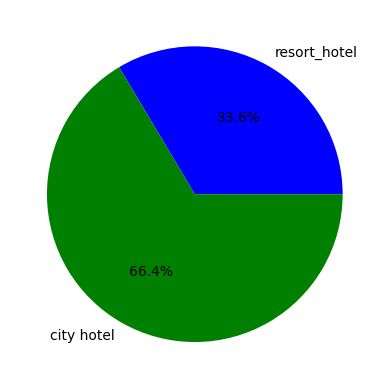

In [25]:
plt.pie([df['resort hotels num'].iloc[0], df['city hotels num'].iloc[0]], labels=['resort_hotel','city hotel'],colors=['blue','green'],autopct='%1.1f%%')
plt.show()


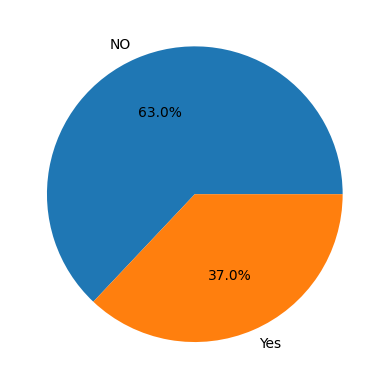

In [26]:
no_count = (df['is_canceled'] == 0).sum()
yes_count = (df['is_canceled'] == 1).sum()
plt.pie([no_count, yes_count], labels=['NO', 'Yes'],autopct='%1.1f%%')
plt.show()

In [27]:
total=(df['is_repeated_guest']==0).sum()
repeated=(df['is_repeated_guest']==1).sum()

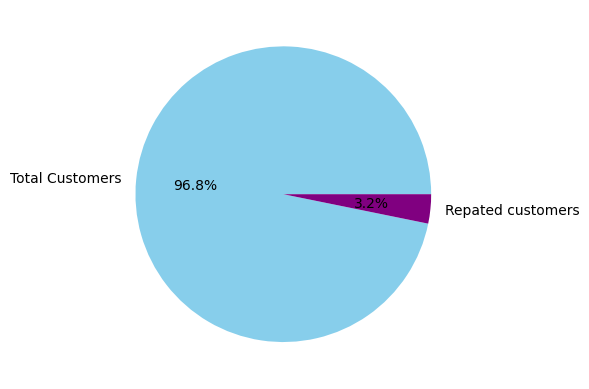

In [28]:
plt.pie([total,repeated], labels=['Total Customers', 'Repated customers'],colors=['skyblue','purple'] ,autopct='%1.1f%%')

plt.show()


In [65]:
df.info()
a=df['reserved_room_type']
b=df['assigned_room_type']
a,b

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 40 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

(0         C
 1         C
 2         A
 3         A
 4         A
          ..
 119385    A
 119386    E
 119387    D
 119388    A
 119389    A
 Name: reserved_room_type, Length: 119390, dtype: object,
 0         C
 1         C
 2         C
 3         A
 4         A
          ..
 119385    A
 119386    E
 119387    D
 119388    A
 119389    A
 Name: assigned_room_type, Length: 119390, dtype: object)

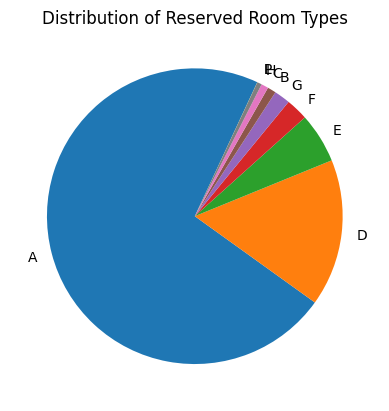

In [90]:
import matplotlib.pyplot as plt

# Group the data by reserved room types and count occurrences
reserved_counts = df['reserved_room_type'].value_counts()

# Plot the pie chart

plt.pie(reserved_counts, labels=reserved_counts.index,  startangle=65)
plt.title('Distribution of Reserved Room Types')
plt.show()